In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from MovementNN import MovementNN
from NNTrainer import NNTrainer

BATCH_SIZE = 128
GAMMA = 0.25
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4
n_hiddens_per_layer=[512, 256, 128]
num_episodes = 100
optimizer="adam"
points_state=True # What kind of inputs to the neural network we are using

/usr/local/anaconda3/latest/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Complete


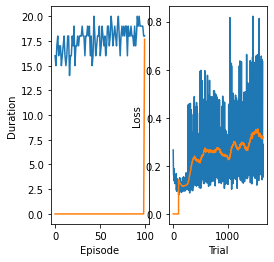

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
trainer = NNTrainer(
    batch_size=BATCH_SIZE,
    gamma=GAMMA,
    eps_start=EPS_START,
    eps_end=EPS_END,
    eps_decay=EPS_DECAY,
    tau=TAU,
    learning_rate=LR,
    n_hiddens_per_layer=n_hiddens_per_layer,
    num_episodes=num_episodes,
    optimizer=optimizer,
    points_state=points_state
)

file_path = "saved_model.pth"

if os.path.exists(file_path):
    trainer.load_model(file_path)

trainer.train()

trainer.save_model(file_path)

Complete


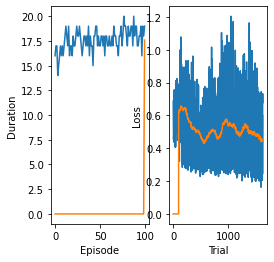

<Figure size 432x288 with 0 Axes>

32 Batch Size: 0.22125
64 Batch Size: 0.35125
128 Batch Size: 0.37875


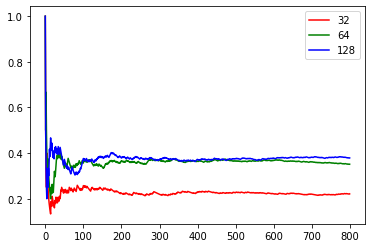

In [3]:
'''Batch size: This is the number of samples used in each training iteration.
A larger batch size can lead to more stable training, but may require more memory
and computational resources. A smaller batch size can lead to more noise in the
training process, but can be trained with less memory and computational resources.
A common batch size for DQNs is around 32-128, so your choice of 128 seems reasonable.'''
batch_list = [32, 64, 128]

batch_correctness_traces = [] 

for batch in batch_list:
    
    trainer = NNTrainer(
        batch_size=batch,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes,
        optimizer=optimizer,
        points_state=points_state
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    batch_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(batch_correctness_traces[0], 'r', label='32') 
plt.plot(batch_correctness_traces[1], 'g', label='64')  
plt.plot(batch_correctness_traces[2], 'b', label='128')  

print(f'32 Batch Size: {batch_correctness_traces[0][len(batch_correctness_traces[0]) - 1]}')
print(f'64 Batch Size: {batch_correctness_traces[1][len(batch_correctness_traces[1]) - 1]}')
print(f'128 Batch Size: {batch_correctness_traces[2][len(batch_correctness_traces[2]) - 1]}')

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


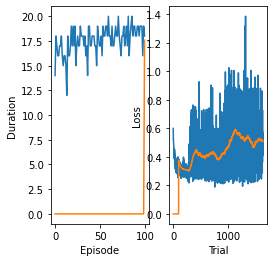

<Figure size 432x288 with 0 Axes>

0.1 Gamma: 0.25625
0.25 Gamma: 0.35125
0.5 Gamma:0.34875
0.75 Gamma: 0.315
0.9 Gamma: 0.325


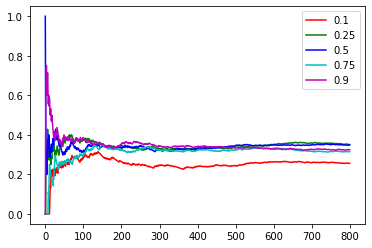

In [4]:
'''Gamma: This is the discount factor used in the Q-learning update.
A higher gamma value will prioritize long-term rewards over immediate rewards,
while a lower gamma value will prioritize immediate rewards. The choice of gamma
can depend on the specifics of your problem, but a value of 0.99 is commonly used.'''

gamma_list = [0.1, 0.25, 0.5, 0.75, 0.9]

gamma_correctness_traces = [] 

for gamma in gamma_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=gamma,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes,
        optimizer=optimizer,
        points_state=points_state
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    gamma_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(gamma_correctness_traces[0], 'r', label='0.1') 
plt.plot(gamma_correctness_traces[1], 'g', label='0.25')  
plt.plot(gamma_correctness_traces[2], 'b', label='0.5')  
plt.plot(gamma_correctness_traces[3], 'c', label='0.75')  
plt.plot(gamma_correctness_traces[4], 'm', label='0.9')  

print(f'0.1 Gamma: {gamma_correctness_traces[0][len(gamma_correctness_traces[0]) - 1]}')
print(f'0.25 Gamma: {gamma_correctness_traces[1][len(gamma_correctness_traces[1]) - 1]}')
print(f'0.5 Gamma:{gamma_correctness_traces[2][len(gamma_correctness_traces[2]) - 1]}')
print(f'0.75 Gamma: {gamma_correctness_traces[3][len(gamma_correctness_traces[3]) - 1]}')
print(f'0.9 Gamma: {gamma_correctness_traces[4][len(gamma_correctness_traces[4]) - 1]}')

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


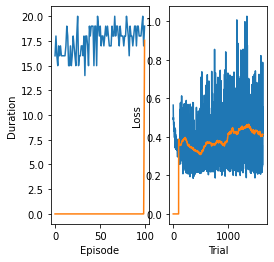

<Figure size 432x288 with 0 Axes>

0.001 Tau: 0.34375
0.005 Tau: 0.2575
0.01 Tau:0.37125
0.05 Tau: 0.2975
0.1 Tau: 0.31125


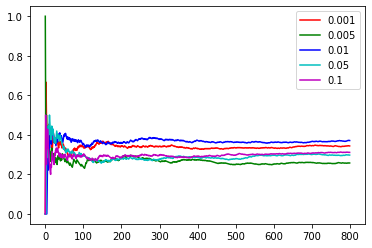

In [5]:
'''Tau: This is the soft update parameter used to update the target network.
A lower tau value will lead to more frequent updates of the target network, 
which can help stabilize training. A common value for tau is around 0.001-0.01,
so your choice of 0.005 seems reasonable.'''

tau_list = [0.001, 0.005, 0.01, 0.05, 0.1]

tau_correctness_traces = [] 

for tau in tau_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=tau,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes,
        optimizer=optimizer,
        points_state=points_state
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    tau_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(tau_correctness_traces[0], 'r', label='0.001') 
plt.plot(tau_correctness_traces[1], 'g', label='0.005')  
plt.plot(tau_correctness_traces[2], 'b', label='0.01')  
plt.plot(tau_correctness_traces[3], 'c', label='0.05')  
plt.plot(tau_correctness_traces[4], 'm', label='0.1')  

print(f'0.001 Tau: {tau_correctness_traces[0][len(tau_correctness_traces[0]) - 1]}')
print(f'0.005 Tau: {tau_correctness_traces[1][len(tau_correctness_traces[1]) - 1]}')
print(f'0.01 Tau:{tau_correctness_traces[2][len(tau_correctness_traces[2]) - 1]}')
print(f'0.05 Tau: {tau_correctness_traces[3][len(tau_correctness_traces[3]) - 1]}')
print(f'0.1 Tau: {tau_correctness_traces[4][len(tau_correctness_traces[4]) - 1]}')

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


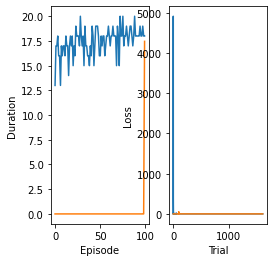

<Figure size 432x288 with 0 Axes>

0.0001 Learning Rate: 0.235
0.001 Learning Rate: 0.3875
0.01 Learning Rate:0.34875
0.1 Learning Rate: 0.05


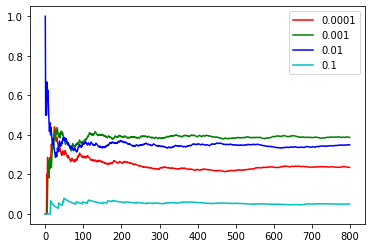

In [6]:
'''Learning rate: This is the rate at which the Q-network weights are updated during training.
A higher learning rate can lead to faster convergence, but may result in overshooting and instability.
A lower learning rate can lead to more stable training, but may take longer to converge.
Your choice of learning rate (1e-4) is commonly used for DQNs.'''

lr_list = [0.0001, 0.001, 0.01, 0.1]

lr_correctness_traces = [] 

for lr in lr_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=lr,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes,
        optimizer=optimizer,
        points_state=points_state
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    lr_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(lr_correctness_traces[0], 'r', label='0.0001') 
plt.plot(lr_correctness_traces[1], 'g', label='0.001')  
plt.plot(lr_correctness_traces[2], 'b', label='0.01')  
plt.plot(lr_correctness_traces[3], 'c', label='0.1')  

print(f'0.0001 Learning Rate: {lr_correctness_traces[0][len(lr_correctness_traces[0]) - 1]}')
print(f'0.001 Learning Rate: {lr_correctness_traces[1][len(lr_correctness_traces[1]) - 1]}')
print(f'0.01 Learning Rate:{lr_correctness_traces[2][len(lr_correctness_traces[2]) - 1]}')
print(f'0.1 Learning Rate: {lr_correctness_traces[3][len(lr_correctness_traces[3]) - 1]}')

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


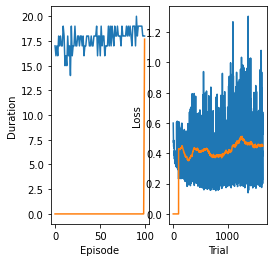

<Figure size 432x288 with 0 Axes>

[1] Arch: 0.0575
[50, 25] Arch: 0.18625
[512, 256, 128] Arch:0.32375
[1024, 512, 256, 128] Arch: 0.3475


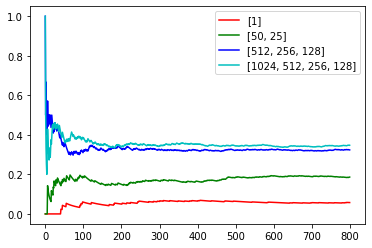

In [7]:
n_hiddens_per_layer_list = [[1], [50, 25], [512, 256, 128], [1024, 512, 256, 128]] 

n_hiddens_per_layer_correctness_traces = [] 

for n_hiddens_per_layer in n_hiddens_per_layer_list:
    
    trainer = NNTrainer(
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=TAU,
        learning_rate=LR,
        n_hiddens_per_layer=n_hiddens_per_layer,
        num_episodes=num_episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    n_hiddens_per_layer_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(n_hiddens_per_layer_correctness_traces[0], 'r', label='[1]') 
plt.plot(n_hiddens_per_layer_correctness_traces[1], 'g', label='[50, 25]')  
plt.plot(n_hiddens_per_layer_correctness_traces[2], 'b', label='[512, 256, 128]')  
plt.plot(n_hiddens_per_layer_correctness_traces[3], 'c', label='[1024, 512, 256, 128]')  

print(f'[1] Arch: {n_hiddens_per_layer_correctness_traces[0][len(n_hiddens_per_layer_correctness_traces[0]) - 1]}')
print(f'[50, 25] Arch: {n_hiddens_per_layer_correctness_traces[1][len(n_hiddens_per_layer_correctness_traces[1]) - 1]}')
print(f'[512, 256, 128] Arch:{n_hiddens_per_layer_correctness_traces[2][len(n_hiddens_per_layer_correctness_traces[2]) - 1]}')
print(f'[1024, 512, 256, 128] Arch: {n_hiddens_per_layer_correctness_traces[3][len(n_hiddens_per_layer_correctness_traces[3]) - 1]}')

# Add a legend and show the plot
plt.legend()
plt.show()

Complete


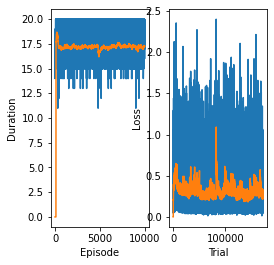

<Figure size 432x288 with 0 Axes>

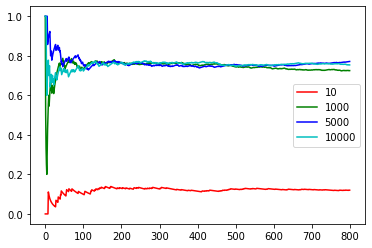

In [8]:
episodes_list = [10, 1000, 5000, 10000]

episodes_correctness_traces = [] 

for episodes in episodes_list:
    
    trainer = NNTrainer(
        batch_size=64,
        gamma=0.25,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        tau=0.05,
        learning_rate=0.001,
        n_hiddens_per_layer=[1024, 512, 256, 128],
        num_episodes=episodes
    )
    
    trainer.train()
    
    for i in range(800):
        trainer.use()
    
    episodes_correctness_traces.append(trainer.correctness_trace)
    
# Plot each line with a different color
plt.plot(episodes_correctness_traces[0], 'r', label='10') 
plt.plot(episodes_correctness_traces[1], 'g', label='1000')  
plt.plot(episodes_correctness_traces[2], 'b', label='5000')  
plt.plot(episodes_correctness_traces[3], 'c', label='10000')  

# Add a legend and show the plot
plt.legend()
plt.show()

In [9]:
# trainer = NNTrainer(
#     batch_size=BATCH_SIZE,
#     gamma=GAMMA,
#     eps_start=EPS_START,
#     eps_end=EPS_END,
#     eps_decay=EPS_DECAY,
#     tau=TAU,
#     learning_rate=LR,
#     n_hiddens_per_layer=n_hiddens_per_layer,
#     num_episodes=num_episodes,
#     optimizer=optimizer,
#     points_state=points_state
# )

# file_path = "saved_model.pth"

# if os.path.exists(file_path):
#     trainer.load_model(file_path)
    
    


# for i in range(1000):
#         trainer.use()
        
# correctness_traces = trainer.correctness_trace


# # Plot each line with a different color
# plt.plot(correctness_traces, 'g', label='Optimal Model')

# print(f'Final {correctness_traces[len(correctness_traces) - 1]}')

# # Add a legend and show the plot
# plt.legend()
# plt.show()

In [10]:
def run_experiment():
    batch_list = [32, 64, 128]
    gamma_list = [0.1, 0.25, 0.5, 0.75, 0.9]
    tau_list = [0.001, 0.005, 0.01, 0.05, 0.1]
    lr_list = [0.0001, 0.001, 0.01]
    n_hiddens_per_layer_list = [[50, 25], [512, 256, 128], [1024, 512, 256, 128]] 
    
    result_matrix = {
        'Batch Size': [],
        'Gamma': [],
        'Tau': [],
        'Learning Rate': [],
        'Arch': [],
        'Accuracy': [],
        'Correctness Trace': []
    }
    
    for batch in batch_list:
        for gamma in gamma_list:
            for tau in tau_list:
                for learning_rate in lr_list:
                    for n_hiddens_per_layer in n_hiddens_per_layer_list:
                                                        
                        trainer = NNTrainer(batch,
                                        gamma=gamma,
                                        eps_start=EPS_START,
                                        eps_end=EPS_END,
                                        eps_decay=EPS_DECAY,
                                        tau=tau,
                                        learning_rate=learning_rate,
                                        n_hiddens_per_layer=n_hiddens_per_layer,
                                        num_episodes=100,
                                        optimizer=optimizer,
                                        points_state=points_state
                                    )

                        trainer.train()

                        for i in range(500):
                            trainer.use()

                        correctness_trace = trainer.correctness_trace
                        accuracy = correctness_trace[len(correctness_trace) - 1]
                        
                        result_matrix['Batch Size'].append(batch)
                        result_matrix['Gamma'].append(gamma)
                        result_matrix['Tau'].append(tau)
                        result_matrix['Learning Rate'].append(learning_rate)
                        result_matrix['Arch'].append(n_hiddens_per_layer)
                        result_matrix['Accuracy'].append(accuracy)
                        result_matrix['Correctness Trace'].append(correctness_trace)
                        
                        df = pandas.DataFrame(result_matrix)
    return df

Complete


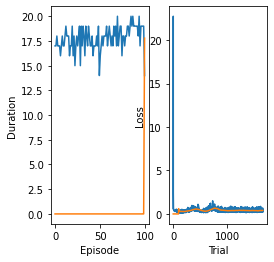

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
import pandas

df = run_experiment()

In [12]:
df

,Batch Size,Gamma,Tau,Learning Rate,Arch,Accuracy,Correctness Trace
0,32,0.1,0.001,0.0001,"[50, 25]",0.208,"[0.0, 0.0, 0.3333333333333333, 0.25, 0.2, 0.16..."
1,32,0.1,0.001,0.0001,"[512, 256, 128]",0.284,"[0.0, 0.0, 0.3333333333333333, 0.25, 0.2, 0.33..."
2,32,0.1,0.001,0.0001,"[1024, 512, 256, 128]",0.346,"[0.0, 0.0, 0.3333333333333333, 0.25, 0.4, 0.33..."
3,32,0.1,0.001,0.0010,"[50, 25]",0.150,"[0.0, 0.0, 0.0, 0.25, 0.2, 0.3333333333333333,..."
4,32,0.1,0.001,0.0010,"[512, 256, 128]",0.398,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571..."
...,...,...,...,...,...,...,...
670,128,0.9,0.100,0.0010,"[512, 256, 128]",0.420,"[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33..."
671,128,0.9,0.100,0.0010,"[1024, 512, 256, 128]",0.366,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571..."
672,128,0.9,0.100,0.0100,"[50, 25]",0.166,"[0.0, 0.0, 0.3333333333333333, 0.25, 0.2, 0.33..."
673,128,0.9,0.100,0.0100,"[512, 256, 128]",0.240,"[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16..."


In [7]:
def run_experiment():
    batch_list = [64, 128]
    gamma_list = [0.25, 0.5]
    tau_list = [0.01, 0.05]
    lr_list = [0.001, 0.01]
    n_hiddens_per_layer_list = [[1024, 512, 256, 128]] 
    
    result_matrix = {
        'Batch Size': [],
        'Gamma': [],
        'Tau': [],
        'Learning Rate': [],
        'Arch': [],
        'Accuracy': [],
        'Correctness Trace': []
    }
    
    for batch in batch_list:
        for gamma in gamma_list:
            for tau in tau_list:
                for learning_rate in lr_list:
                    for n_hiddens_per_layer in n_hiddens_per_layer_list:
                                                        
                        trainer = NNTrainer(batch,
                                        gamma=gamma,
                                        eps_start=EPS_START,
                                        eps_end=EPS_END,
                                        eps_decay=EPS_DECAY,
                                        tau=tau,
                                        learning_rate=learning_rate,
                                        n_hiddens_per_layer=n_hiddens_per_layer,
                                        num_episodes=100,
                                        optimizer=optimizer,
                                        points_state=points_state
                                    )

                        trainer.train()

                        for i in range(500):
                            trainer.use()

                        correctness_trace = trainer.correctness_trace
                        accuracy = correctness_trace[len(correctness_trace) - 1]
                        
                        result_matrix['Batch Size'].append(batch)
                        result_matrix['Gamma'].append(gamma)
                        result_matrix['Tau'].append(tau)
                        result_matrix['Learning Rate'].append(learning_rate)
                        result_matrix['Arch'].append(n_hiddens_per_layer)
                        result_matrix['Accuracy'].append(accuracy)
                        result_matrix['Correctness Trace'].append(correctness_trace)
                        
                        df = pandas.DataFrame(result_matrix)
    return df

Complete


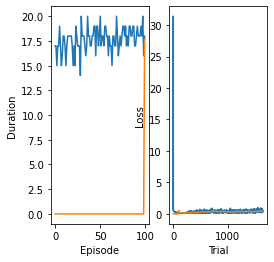

<Figure size 432x288 with 0 Axes>

,Batch Size,Gamma,Tau,Learning Rate,Arch,Accuracy,Correctness Trace
0,64,0.25,0.01,0.001,"[1024, 512, 256, 128]",0.404,"[1.0, 0.5, 0.6666666666666666, 0.5, 0.4, 0.333..."
1,64,0.25,0.01,0.010,"[1024, 512, 256, 128]",0.288,"[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16..."
2,64,0.25,0.05,0.001,"[1024, 512, 256, 128]",0.404,"[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.333..."
3,64,0.25,0.05,0.010,"[1024, 512, 256, 128]",0.064,"[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16..."
4,64,0.50,0.01,0.001,"[1024, 512, 256, 128]",0.408,"[0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666..."
5,64,0.50,0.01,0.010,"[1024, 512, 256, 128]",0.166,"[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16..."
6,64,0.50,0.05,0.001,"[1024, 512, 256, 128]",0.318,"[0.0, 0.0, 0.3333333333333333, 0.25, 0.2, 0.16..."
7,64,0.50,0.05,0.010,"[1024, 512, 256, 128]",0.350,"[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33..."
8,128,0.25,0.01,0.001,"[1024, 512, 256, 128]",0.476,"[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.333..."
9,128,0.25,0.01,0.010,"[1024, 512, 256, 128]",0.332,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571..."


<Figure size 432x288 with 0 Axes>

In [8]:
import pandas

df = run_experiment()

df

In [16]:
df = df.sort_values(by=['Accuracy'], ascending=False)
df

,Batch Size,Gamma,Tau,Learning Rate,Arch,Accuracy,Correctness Trace
8,128,0.25,0.01,0.001,"[1024, 512, 256, 128]",0.476,"[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.333..."
4,64,0.50,0.01,0.001,"[1024, 512, 256, 128]",0.408,"[0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666..."
0,64,0.25,0.01,0.001,"[1024, 512, 256, 128]",0.404,"[1.0, 0.5, 0.6666666666666666, 0.5, 0.4, 0.333..."
2,64,0.25,0.05,0.001,"[1024, 512, 256, 128]",0.404,"[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.333..."
12,128,0.50,0.01,0.001,"[1024, 512, 256, 128]",0.404,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666,..."
10,128,0.25,0.05,0.001,"[1024, 512, 256, 128]",0.390,"[0.0, 0.0, 0.0, 0.0, 0.2, 0.3333333333333333, ..."
14,128,0.50,0.05,0.001,"[1024, 512, 256, 128]",0.390,"[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.33..."
11,128,0.25,0.05,0.010,"[1024, 512, 256, 128]",0.388,"[0.0, 0.5, 0.6666666666666666, 0.5, 0.4, 0.333..."
7,64,0.50,0.05,0.010,"[1024, 512, 256, 128]",0.350,"[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33..."
13,128,0.50,0.01,0.010,"[1024, 512, 256, 128]",0.346,"[1.0, 1.0, 1.0, 0.75, 0.8, 0.8333333333333334,..."


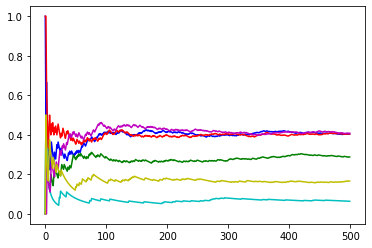

In [18]:
plt.plot(df['Correctness Trace'][0], 'b')
plt.plot(df['Correctness Trace'][1], 'g')
plt.plot(df['Correctness Trace'][2], 'r')
plt.plot(df['Correctness Trace'][3], 'c')
plt.plot(df['Correctness Trace'][4], 'm')
plt.plot(df['Correctness Trace'][5], 'y')

plt.show()